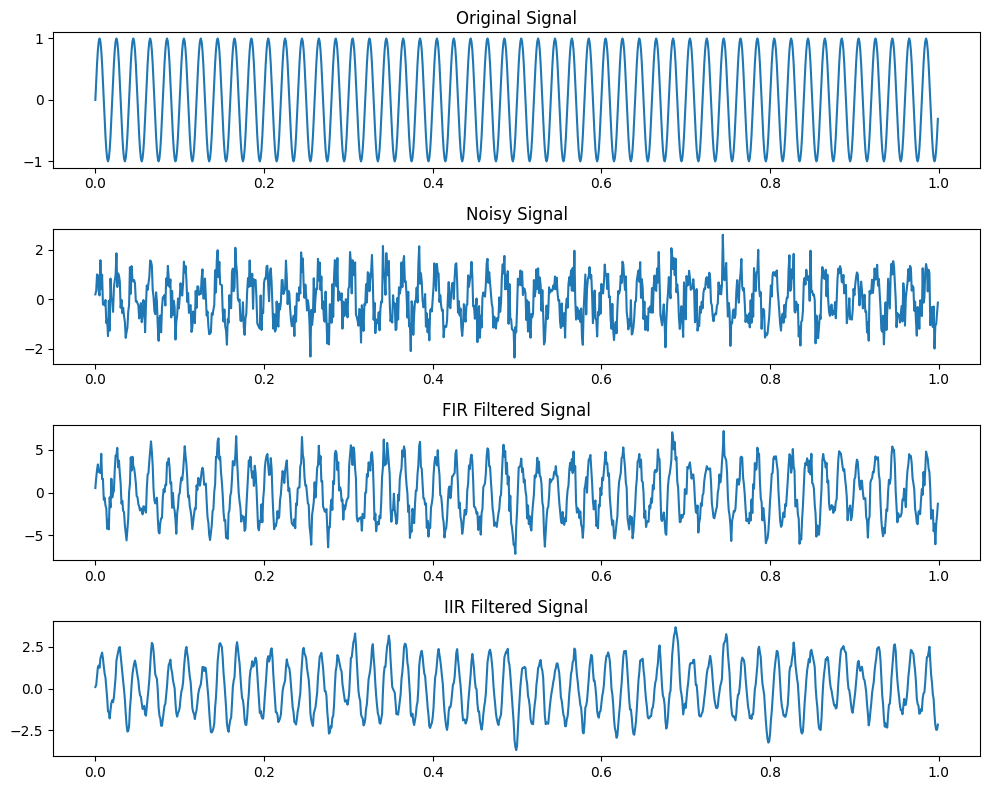

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def fir_filter(x, b):
    return np.convolve(x, b, mode='same')

def iir_filter(x, b, a):
    y = np.zeros_like(x)
    for n in range(len(x)):
        if n == 0:
            y[n] = b[0] * x[n]
        elif n == 1:
            y[n] = b[0] * x[n] + b[1] * x[n-1]
        else:
            y[n] = b[0] * x[n] + b[1] * x[n-1] - a[1] * y[n-1]
    return y

def lms_filter(x, d, mu, M):
    N = len(x)
    y = np.zeros(N)
    e = np.zeros(N)
    w = np.zeros(M)
    
    for n in range(M, N):
        x_n = x[n-M:n][::-1] 
        y[n] = np.dot(w, x_n)
        e[n] = d[n] - y[n]
        w = w + mu * e[n] * x_n
    return y, e

fs = 1000
t = np.arange(0, 1, 1/fs)
f_signal = 50
signal = np.sin(2 * np.pi * f_signal * t)
noise = np.random.normal(0, 0.5, len(t))
noisy_signal = signal + noise

b_fir = np.array([1, 1, 2])
b_iir = np.array([0.5, 0.2])
a_iir = np.array([1, -0.8])

fir_output = fir_filter(noisy_signal, b_fir)

iir_output = iir_filter(noisy_signal, b_iir, a_iir)

mu = 0.05
M = 4
lms_output, lms_error = lms_filter(noisy_signal, signal, mu, M)

plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.subplot(4, 1, 2)
plt.plot(t, noisy_signal)
plt.title('Noisy Signal')
plt.subplot(4, 1, 3)
plt.plot(t, fir_output)
plt.title('FIR Filtered Signal')
plt.subplot(4, 1, 4)
plt.plot(t, iir_output)
plt.title('IIR Filtered Signal')
plt.tight_layout()
plt.show()
